
<h1 id="AI-Lab---initial-guidelines-to-generate-your-reports">AI Lab - initial guidelines to generate your reports<a class="anchor-link" href="#AI-Lab---initial-guidelines-to-generate-your-reports">¶</a></h1>



<p>This is a small sample notebook for you with some information that you might use to generate you reports. It has some guidelines, some initial ideas, and some questions for you to think about and discuss. This is only an initial notebook, please organize as you like.</p>
<p>I expect you to grow your notebooks into full project reports, with your work and results, the description of your steps, justification for your choices, and your ideas and considerations. Please use both text and visualisations to clarify results and concepts. Please try also to capture the discussion we had in class, and the discussion you had afterwards. The final reports should reflect the work of your group and your very own results, ideas and discussion.</p>
<p>If you need domain specific knowlegde you can check again some of the handouts, and you can also explore further some of the links in the handouts, or you can ask. However, please try not to be too domain specific in your thinking and in your reports, try to to apply the theory you have learnt and use your observations and results to extract general underlying concepts.</p>
<p>For the first AI Lab day we progress all together, and below I give you some more pointers for the first analysis steps. This is so you can familizarize with the data. After this, from day 2, you will progress more independently, and for days 3 and 4 you will divide into groups for the data challenge.</p>



<h2 id="Introduction">Introduction<a class="anchor-link" href="#Introduction">¶</a></h2>



<p>Please include a short introduction based on what we discussed in class:</p>
<ul>
<li>Background</li>
<li>Overall Aim</li>
<li>Specific Objectives</li>
</ul>
<p>[...]</p>
<p>This should be based on what we discussed in class. Please ask any questions you have or clarifications, you can also consult the handouts. I would probably aim for no more than 200 words for this section.</p>



<h2 id="Materials-and-Methods">Materials and Methods<a class="anchor-link" href="#Materials-and-Methods">¶</a></h2><p>Please include:</p>
<ul>
<li>A short description of the data and how they were obtained.</li>
<li>A short description of the methods you will use and why. </li>
</ul>
<p>[...]</p>
<p>I would aim for no longer than 300 words, but you could also provide more details and justification of data and methods when you load them/use them in the following sections.</p>



<hr/>
<hr/>



<h2 id="Python-libraries">Python libraries<a class="anchor-link" href="#Python-libraries">¶</a></h2>


In [48]:


#Remember you can use command line mode if installations are needed
#!pip install numpy==1.19.5
#!pip install matplotlib
#!pip install seaborn
#!pip install pandas
#[....] for you to add. Please include here for reference the libraries you will use. 




In [49]:


import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt             #visualisation
import seaborn as sns   #visualisation
%matplotlib inline     
sns.set(color_codes=True)
#[....] for you to add





<hr/>



<h2 id="Exploratory-data-analysis">Exploratory data analysis<a class="anchor-link" href="#Exploratory-data-analysis">¶</a></h2>



<p>First we load the data. There are four datasets. They correspond to four different experiments in two different cell lines, and using two different single cell RNA sequencing techniques. You might proceed one experiment at a time, or download the metadata for all experiments and discuss them together. Here I show the example for one of the datasets.</p>



<h3 id="MCF7-SmartSeq-experiment">MCF7 SmartSeq experiment<a class="anchor-link" href="#MCF7-SmartSeq-experiment">¶</a></h3>



<p>First we read in the metadata. There are 4 metadata files. One for each experiment. They are tab delimited file TSV.</p>


In [50]:


# Remember to change the path. This should point to where you have stored the metadata files. 
df_meta = pd.read_csv("SmartSeq/MCF7_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(df_meta))
print("First column: ", df_meta.iloc[ : , 0])




Dataframe dimensions: (383, 8)
First column:  Filename
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam      MCF7
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam      MCF7
                                                            ... 
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    MCF7
Name: Cell Line, Length: 383, dtype: object


In [51]:


df_meta.head(5)   




,Cell Line,Lane,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
Filename,,,,,,,,
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A10,Hypo,72,S28,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A11,Hypo,72,S29,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A12,Hypo,72,S30,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A1,Norm,72,S1,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A2,Norm,72,S2,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"



<p>You comments</p>
<ul>
<li>what are the raws? </li>
<li>what are the columns?</li>
</ul>
<p>[....]</p>



<p>Next we download the actual sequencing data. In this case the datasets are space-delimited. The name of the file gives you information on cell line, the technology used and processing. The format is: CellLine_Technology_preprocessing_Data.txt</p>



<p>You can download all data files, and then discuss them together later, or proceed one data file at the time.</p>


In [52]:


# Remember to change the path. This should point to where you have stored the data files. 
df = pd.read_csv("SmartSeq/MCF7_SmartS_Unfiltered_Data.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(df))
print("First column: ", df.iloc[ : , 0])




Dataframe dimensions: (22934, 383)
First column:  "WASH7P"         0
"MIR6859-1"      0
"WASH9P"         1
"OR4F29"         0
"MTND1P23"       0
              ... 
"MT-TE"          4
"MT-CYB"       270
"MT-TT"          0
"MT-TP"          5
"MAFIP"          8
Name: "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam", Length: 22934, dtype: int64



<p>For each data file, describe its structure and content.</p>
<ul>
<li>File dimensions</li>
<li>Raws/columns are</li>
<li>This dataframe uses Symbols to identify genes (e.g. You can add the discussion we had in class on identifiers)
[...]</li>
</ul>


In [53]:


df.shape




(22934, 383)

In [54]:


list(df.columns)




['"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A8_Hypo_S26_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A9_Hypo_S27_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_B10_Hypo_S76_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_B11_Hypo_S77_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_B12_Hypo_S78_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_B1_Norm_S49_Aligned.sortedByCoord.out.bam"',
 '"outpu

In [55]:


gene_symbls = df.index
print("Dataframe indexes: ", gene_symbls)




Dataframe indexes:  Index(['"WASH7P"', '"MIR6859-1"', '"WASH9P"', '"OR4F29"', '"MTND1P23"',
       '"MTND2P28"', '"MTCO1P12"', '"MTCO2P12"', '"MTATP8P1"', '"MTATP6P1"',
       ...
       '"MT-TH"', '"MT-TS2"', '"MT-TL2"', '"MT-ND5"', '"MT-ND6"', '"MT-TE"',
       '"MT-CYB"', '"MT-TT"', '"MT-TP"', '"MAFIP"'],
      dtype='object', length=22934)



<hr/>



<p><strong><em>Exploratory data analysis</em></strong> include a broad range of possible tasks:</p>
<ul>
<li>check how large are the files</li>
<li>are the data types all numeric</li>
<li>what can you observe by looking at the data (maybe use some plots to explain)</li>
</ul>


In [56]:


np.shape(df)




(22934, 383)

In [57]:


df.head(5)




,"""output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"""
"""WASH7P""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
"""MIR6859-1""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""WASH9P""",1,0,0,0,0,1,10,1,0,0,...,1,1,0,0,0,0,1,1,4,5
"""OR4F29""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
"""MTND1P23""",0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [58]:


df.dtypes




"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"      int64
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"      int64
                                                              ...  
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    int64
Length: 383, dtype: object

In [59]:


# you can go from data frame to matrix if you prefer
X= df.to_numpy()
X
np.shape(X)
#note this might need to be transposed later on in the analysis




(22934, 383)


<p>The aim is to understand the data by summarizing their main characteristics (e.g. tables with statistics or visually). This step is the very first one when we analyse the data. It can be time consuming but it is very useful to understand the data, perform some quality control, and define the downstream analysis.</p>
<p>Of note, there are ways of carrying out EDA and some steps that are domain specific, and even in the same domain sometimes there are different ways of carrying out EDA. It might depends on the specific technology or the specific question. However, most of the concepts are general and applicable to many contexts. The focus should be on the general context.</p>
<p>You have an <strong>"unfiltered"</strong> data file. These are data are matrixes of counts, no filter was applied and no normalization was applied. It is a good idea to start to explore this first to understand the issues with the dataset and discuss them, and what are the general implications of the issues you encounter.</p>
<p>You have also <strong>"filtered"</strong> data and <strong>"normalized"</strong> data. These have been pre-processed for you so eliminate some of the issues. You can use these to train your classifiers.</p>



<p><strong><em>Are there missing values in the data?</em></strong></p>
<p>This is a recurring issues in many dataset, including in health. If there were missing data you could remove them, or try some missing data imputation.</p>


In [60]:


print(df.isnull().sum())




"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    0
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"    0
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"    0
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"      0
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"      0
                                                             ..
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    0
Length: 383, dtype: int64


In [61]:


#df = df.dropna()    # Dropping the missing values.
#df.count()




In [62]:


#print(df.isnull().sum())   # After dropping the values





<p>Other general questions you might like to ask yourself in EDA are:</p>
<ul>
<li><strong><em>are there some outliers in the features?</em></strong></li>
<li><strong><em>are there outliers in the cases?</em></strong></li>
<li><strong><em>are the data normalized?</em></strong> </li>
</ul>
<p>Below some first step, for you to continue and expand, or there might be other things you like to check.</p>


In [63]:


# you can check specific raws and columns in your data
df.iloc[ 1:5 , 1:5 ]




,"""output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"""
"""MIR6859-1""",0,0,0,0
"""WASH9P""",0,0,0,0
"""OR4F29""",0,0,0,0
"""MTND1P23""",0,0,0,0



<p>You can look as some descriptive statistics, for the features (the genes) or for the cases (the single cells). Below is the example of the cells. I show mean expression, standard deviation, and other statistics for the expression of the genes in each cell. You can also look at the expression of each gene across cells.</p>


In [64]:


df.describe()




,"""output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"""
count,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,...,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000
mean,40.817651,0.012253,86.442400,1.024636,14.531351,56.213613,75.397183,62.767725,67.396747,2.240734,...,17.362562,42.080230,34.692422,32.735284,21.992718,17.439391,49.242784,61.545609,68.289352,62.851400
std,465.709940,0.207726,1036.572689,6.097362,123.800530,503.599145,430.471519,520.167576,459.689019,25.449630,...,193.153757,256.775704,679.960908,300.291051,153.441647,198.179666,359.337479,540.847355,636.892085,785.670341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,0.000000,5.000000,0.000000,7.000000,23.000000,39.000000,35.000000,38.000000,1.000000,...,9.000000,30.000000,0.000000,17.000000,12.000000,9.000000,27.000000,30.000000,38.000000,33.000000
max,46744.000000,14.000000,82047.000000,289.000000,10582.000000,46856.000000,29534.000000,50972.000000,36236.000000,1707.000000,...,17800.000000,23355.000000,81952.000000,29540.000000,12149.000000,19285.000000,28021.000000,40708.000000,46261.000000,68790.000000



<p>You can plot the values for some features or for some cases</p>


<Axes: xlabel='"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"'>

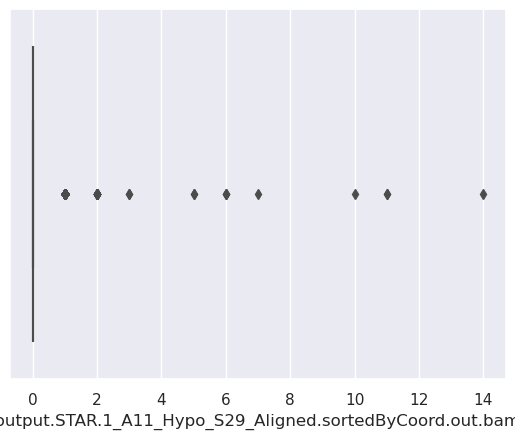

In [65]:


cnames = list(df.columns)
cnames[1]
sns.boxplot(x=df[cnames[1]])




<Axes: xlabel='"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"'>

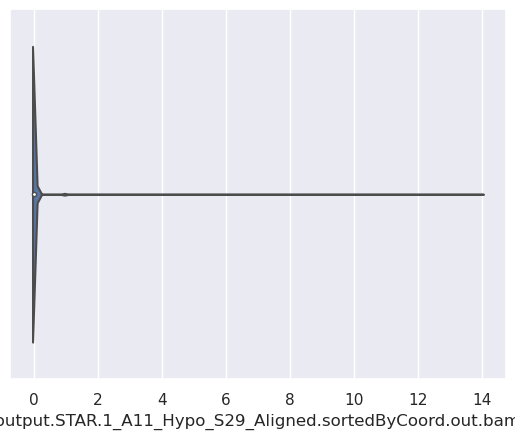

In [66]:


# Violin plots can be usefull. They are similar to a box plot, with the addition of a rotated kernel density plot on each side. So you can see the probability density of the data at different values. 
sns.violinplot(x=df[cnames[1]])





<p>You can plot the distrubtion of the data for each sample, or viceversa. Below I'm plotting the violin plots of the features' values (the gene expression) for the first 50 samples (our single cells). Each violin plot corresponds to a single cell.</p>


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

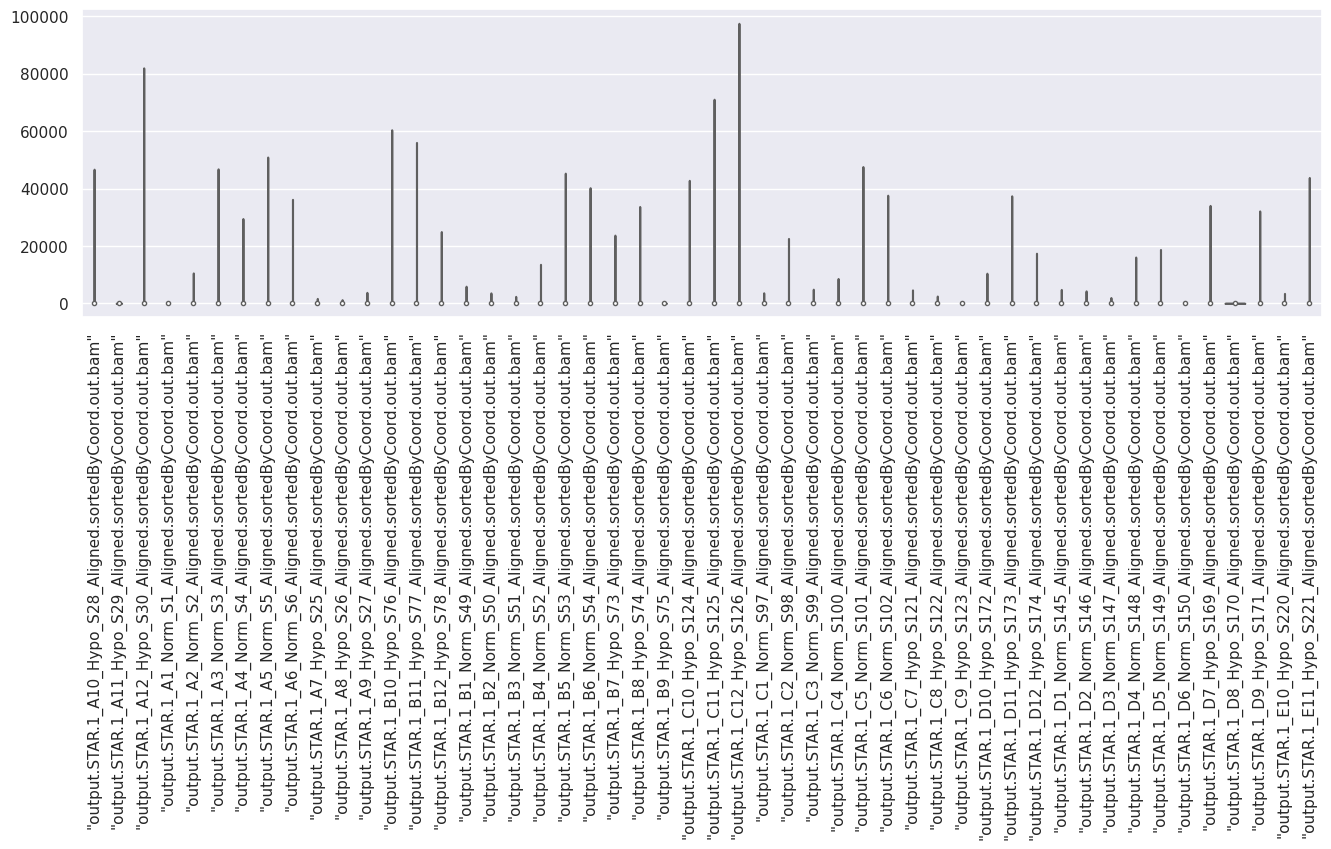

In [67]:


df_small = df.iloc[:, :50]
np.shape(df_small)
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)





<hr/>



<p>Let's look for <strong><em>outliers</em></strong>. A standard appraoch with outliers is to compute the inter quantile range, and use this to define outliers and filter them as below.</p>


In [68]:


Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)




"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    17.0
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"     0.0
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"     5.0
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"       0.0
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"       7.0
                                                              ... 
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"     9.0
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    27.0
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    30.0
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    38.0
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    33.0
Length: 383, dtype: float64



<p>Let's try to eliminate outliers using the quantile range.</p>
<p>PS. Create a new dataset. It is always tidier in EDA. You can eliminate the old one later if you are happy with your new filtered or transformed dataset.</p>


In [69]:


df_noOut = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_noOut.shape
df_noOut.head(3)




,"""output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"""
"""MIR6859-1""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""CICP3""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""FAM87B""",0,0,0,0,0,0,0,0,2,0,...,0,1,0,0,0,0,0,0,0,0



<p>Let's look at our violin plots again, for the dataset with outliers removed:</p>


<Axes: xlabel='"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"'>

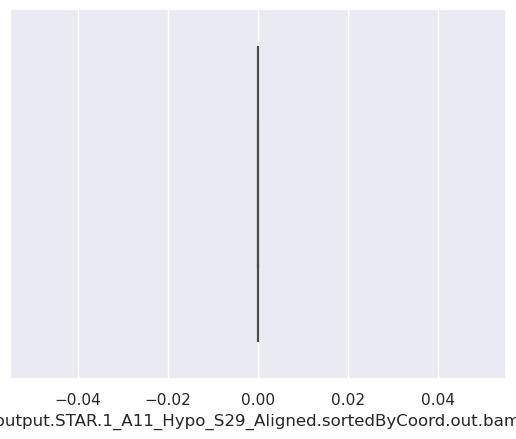

In [70]:


sns.boxplot(x=df_noOut[cnames[1]])




[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

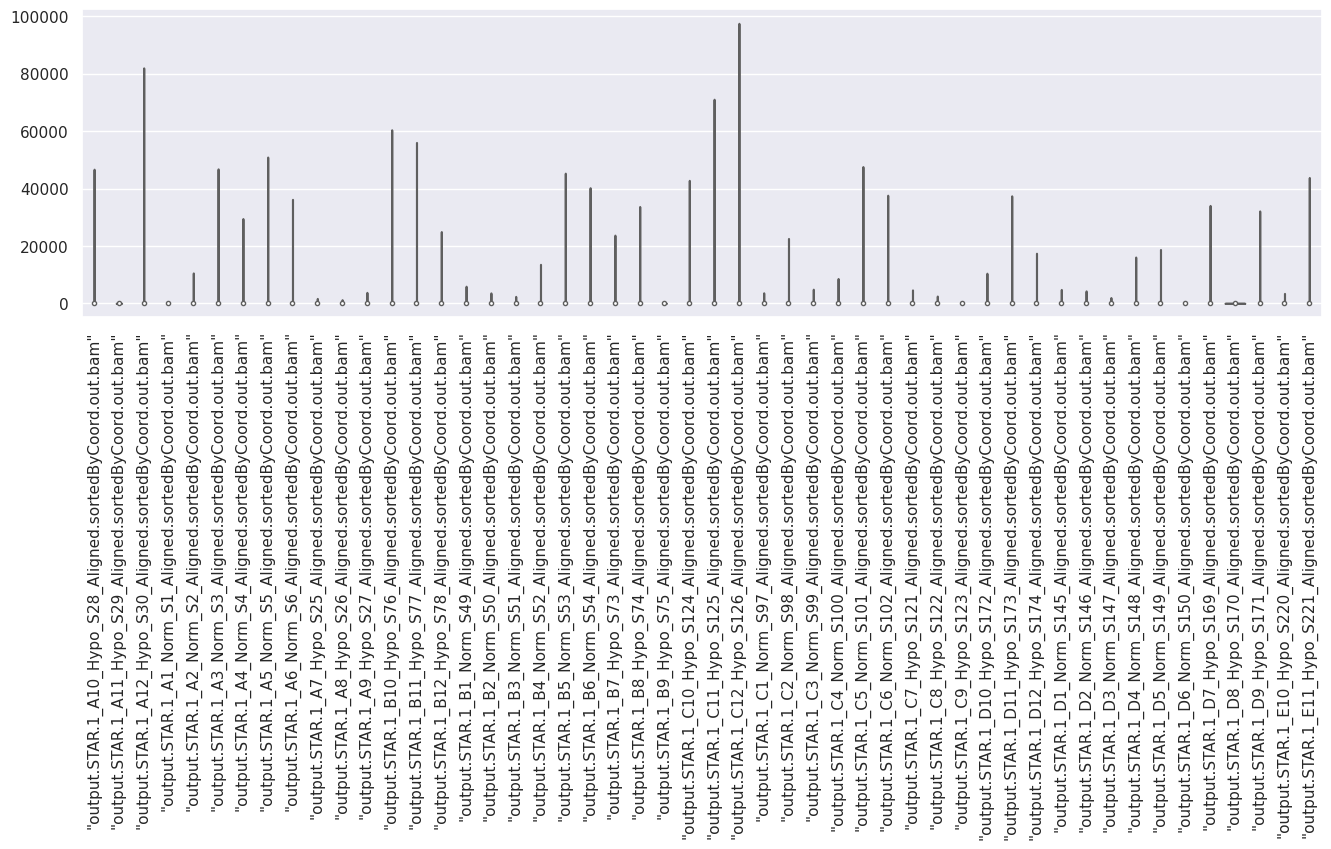

In [71]:


df_noOut_small = df.iloc[:, :50]
np.shape(df_noOut_small)
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_noOut_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)





<p>They don't look good. We have just zeros now. Simply removing outliers would not work here, as many genes/features would simply be 0 if we excluded the outliers. So we need to proceed differently, as <em>the outliers seem to be the values carrying the information in this case</em>.</p>



<p>In fact you might have observed that <strong><em>the data are sparse</em></strong>.</p>
<p>Features with sparse data are features that have mostly zero values. For example, a sensor connected with a door will send a signal only when there is a movement of the door. The seonsor recording will have mostly zero values, because the door is not always moving. The rare non-zero values will be the valuable information: somebody is entering the room. Large sparse matrices are common, and encountered often in applied machine learning tasks. Examples of sparse data include data encodings that map categories to counts, vectors of one-hot-encoded words or counts of categorical data. On the other hand, features with dense data have predominantly non-zero values.</p>
<ul>
<li><strong><em>can you quantify the sparsity?</em></strong></li>
<li><strong><em>would using sparse matrix representation be an advantage?</em></strong></li>
<li><strong><em>what would you do to adress this sparsity?</em></strong></li>
</ul>



<hr/>



<p>You can also inspect summary statistics of the <strong><em>distribution</em></strong> of your data. For example you can look at Skewness and Kurtosis of the gene expression profiles.</p>


Text(0.5, 0, 'Skewness of single cells expression profiles - original df')

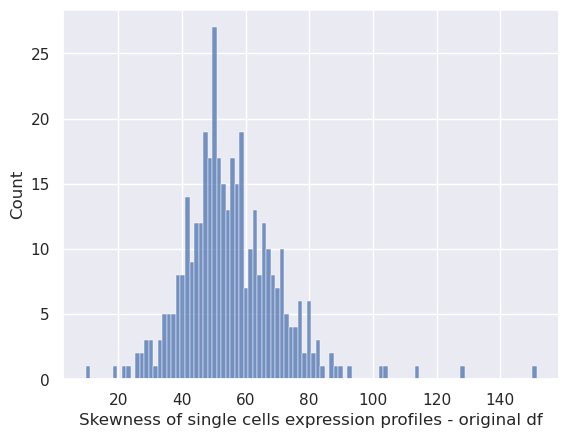

In [72]:


from scipy.stats import kurtosis, skew
colN = np.shape(df)[1]
colN
df_skew_cells = []
for i in range(colN) :     
     v_df = df[cnames[i]]
     df_skew_cells += [skew(v_df)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
df_skew_cells
sns.histplot(df_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles - original df')




Text(0.5, 0, 'Kurtosis of single cells expression profiles - original df')

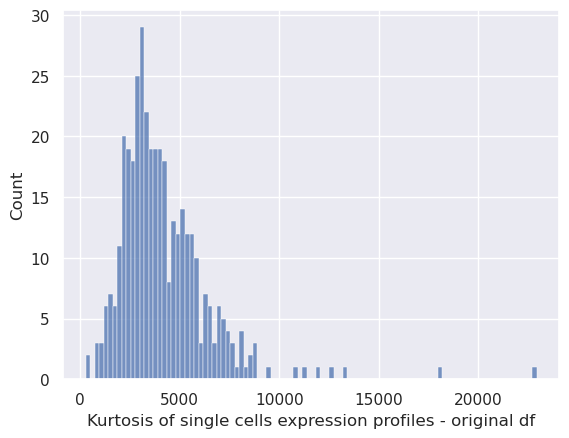

In [73]:


df_kurt_cells = []
for i in range(colN) :     
     v_df = df[cnames[i]]
     df_kurt_cells += [kurtosis(v_df)]   
 #   df_kurt_cells += [df[cnames[i]].kurt()]
df_kurt_cells
sns.histplot(df_kurt_cells,bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - original df')





<p>For reference Skewness and Kurtosis for a normal distribution are below.</p>


In [74]:


xnorm = np.random.normal(0, 2, 10000000)   # create random values based on a normal distribution
xnorm 

print( "Excess kurtosis of normal distribution: ",  kurtosis(xnorm) )
print( "Skewness of normal distribution: ", skew(xnorm) )




Excess kurtosis of normal distribution:  0.00034202290459539597
Skewness of normal distribution:  0.0012374844010439705



<p>The distribution are highly non-normal, skewed with heavy tails. Why is this a problem?</p>
<p><strong><em>Data transformation</em></strong> can be an option. For example, you can try to log the data. Log based 2 is often used as +1 indicate doubling of the feature abundance (gene expression in this case) and -1 halving of the feature abundance/gene expression. In this way, changes in the values of the feature upwards or downwards are symmetrical, so up-regulation and down-regulation of a gene with respect to a control is symmetrical.</p>


<Axes: xlabel='"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"'>

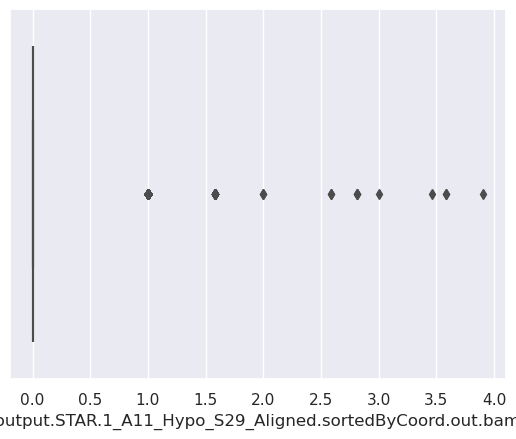

In [75]:


df11_log2 = np.log2(df[cnames[1]]+1)
sns.boxplot(x=df11_log2)




<Axes: xlabel='"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"'>

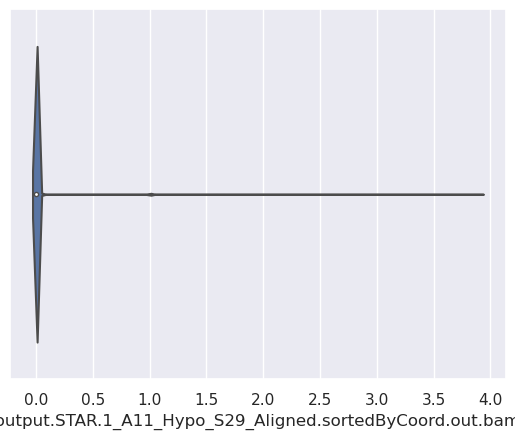

In [76]:


sns.violinplot(x=df11_log2)





<p>We can check the summary statistics again, and plot the trasformed gene expression profile of each cell</p>


In [77]:


display(df11_log2.describe().round(2))




count    22934.00
mean         0.01
std          0.12
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          3.91
Name: "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam", dtype: float64

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

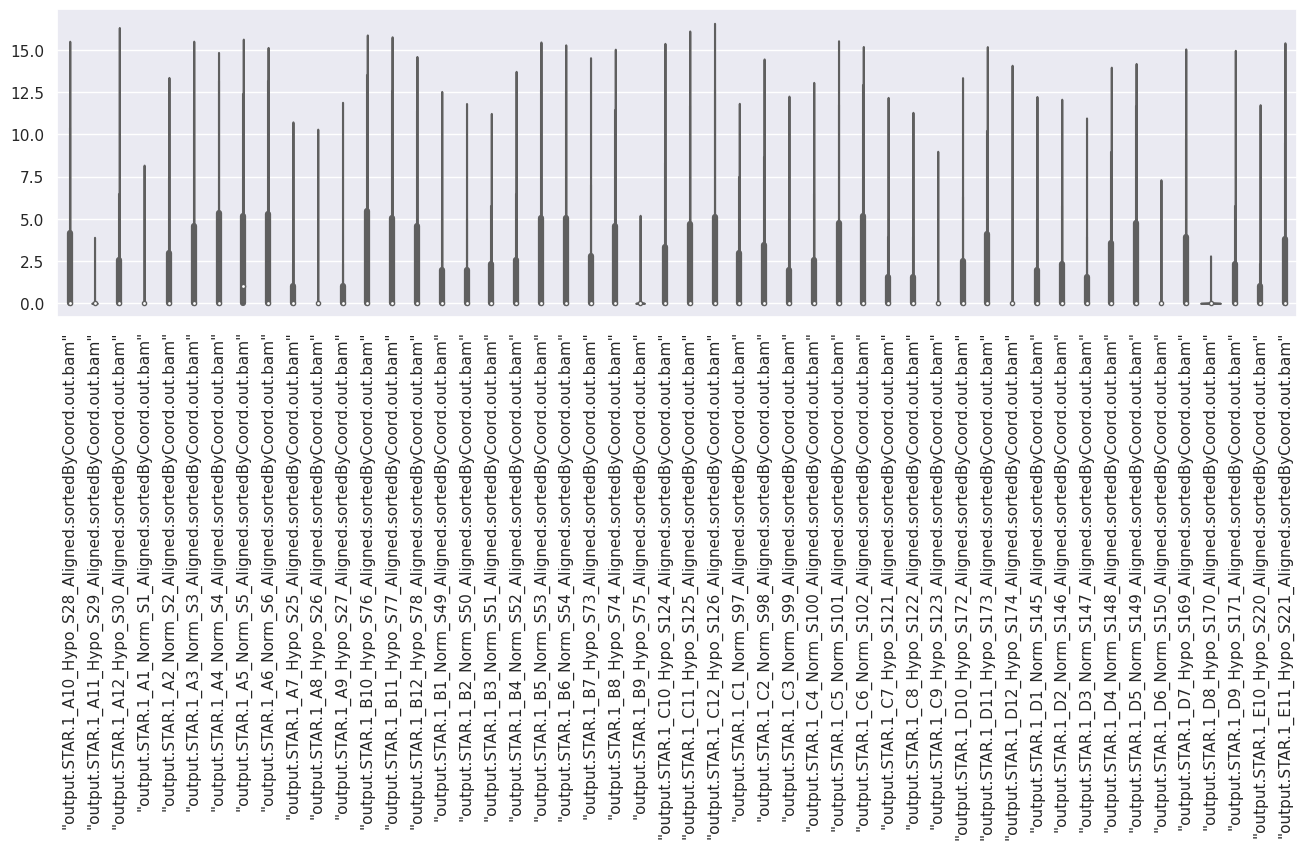

In [78]:


df1 = df + 1
df1_log2 = df1.apply(np.log2)
# I'm selecting part of the data as the plots would otherwise take too long to generate
df1_log2_small = df1_log2.iloc[:, :50]
np.shape(df1_log2_small)
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df1_log2_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)




Text(0.5, 0, 'Skewness of single cells expression profiles - log2 df')

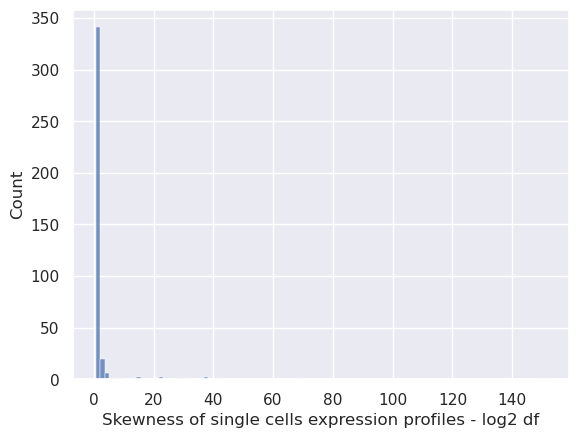

In [79]:


df1_log2_skew_cells = []
for i in range(colN) :     
     v_df = df1_log2[cnames[i]]
     df1_log2_skew_cells += [skew(v_df)]   
df1_log2_skew_cells
sns.histplot(df1_log2_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles - log2 df')




In [81]:


df1_log2_kurt_cells = []
for i in range(colN) :     
     v_df = df1_log2[cnames[i]]
     df1_log2_kurt_cells += [kurtosis(v_df)] 
 f1_log2_kurt_cells
sns.histplot(df1_log2_kurt_cells,bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - log2 df')




IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)


<p>If we are happy with this transformation we can use this transformed data in what follows.</p>


In [ ]:


df = df1_log2





<hr/>



<p>Each single cell was sequenced independently, so there might be need of normalizing the data between cells. Let's plot the gene expression distributions for each cell, and compare them.</p>


In [ ]:


df_small = df.iloc[:, 10:30]  #just selecting part of the samples so run time not too long
sns.displot(data=df_small,palette="Set3",kind="kde", bw_adjust=2)





<p>By looking at these plots, do you think the data are <strong><em>normalized</em></strong>? How would you normalize them?</p>
<p>Try the plots above both with the "...unfiltered...txt" (not filtered and not normalized), "...filtered...txt" (filtered but not normalized)", and with the "..normalized...txt" data.</p>



<hr/>



<p>It can also be useful to check for <strong><em>duplicate raws</em></strong>. These can often happen in any data recording tasks. In our case, there could be some features that have the same counts across experiments but different names. There could be many reasons why this happens. They could be the same entity as there is redundacy in gene annotation, or they could reflect other issues, for example when in the same region there are overlapping gene annotations. It is useful to inspect and maybe drop one of the duplicate features. However, this needs to be noted and recorded, as it could create issues with data interpretation later on. For example, in our case, if two genes have the same counts we could drop one, as they are likely to be two different annotations of the same gene (or genes with overlapping genomic regions for which we cannot resolve differences in expression). If we consider both of the duplicate features/genes, we are potentially duplicating data, creating a bias. However, if we drop one of them we will miss it in further analyses. For example, the gene that has been dropped could be the one corresponding to the most recurring annotation in previous studies. If we dropped this feature without recording this in a log file, we would miss an important biological link between the current study and historical studies.</p>


In [ ]:


duplicate_rows_df = df[df.duplicated(keep=False)]
print("number of duplicate rows: ", duplicate_rows_df.shape)
print("number of duplicate rows: ", duplicate_rows_df)





<p>We could check case by case whether to remove. First let's understand where the duplicates really are.</p>


In [ ]:


#print("names of duplicate rows: ",duplicate_rows_df.index)
duplicate_rows_df_t = duplicate_rows_df.T
duplicate_rows_df_t
c_dupl = duplicate_rows_df_t.corr()
c_dupl




In [ ]:


# warning: the scatter plots below might take a long time if the number of duplicate features is large
# sns.pairplot(duplicate_rows_df_t)





<p>We can look at the statistics of the gene expression profiles of genes/features that seem duplicates. They might be features with many zeros, or many missing data.</p>


In [ ]:


duplicate_rows_df_t.describe()




In [ ]:


#df.count()      # Used to count the number of rows and columns





<p>Below we drop duplicates</p>


In [ ]:


df_noDup = df.drop_duplicates()
#df_noDup




In [ ]:


df_noDup.count()





<p>If we are happy that we are not missing key features by excluding duplicates we can replace our matrix/dataframe with the new reduced matrix/dataframe</p>


In [ ]:


df = df_noDup





<hr/>



<p>After the basic EDA, we can explore the <strong><em>data structure</em></strong>.</p>



<p>We can check the correlation between features (i.e. the expression of different genes), or between samples (i.e. the correlation between gene expression profiles of the different cells), and visualize the results in tables or plots, e.g. using Heatmaps.</p>
<p>Below I look at the correlation between samples:</p>


In [ ]:


plt.figure(figsize=(10,5))
#df_small = df.iloc[:, :50]
#c= df_small.corr()
c= df.corr()
midpoint = (c.values.max() - c.values.min()) /2 + c.values.min()
#sns.heatmap(c,cmap='coolwarm',annot=True, center=midpoint )
sns.heatmap(c,cmap='coolwarm', center=0 )
print("Number of cells included: ", np.shape(c))
print("Average correlation of expression profiles between cells: ", midpoint)
print("Min. correlation of expression profiles between cells: ", c.values.min())




In [ ]:


# You can also visualized using plots
# sns.pairplot(df_small)





<p>You could look at the distribution of the correlation between gene expression profiles using Histogram</p>


In [ ]:


np.shape(c)
type(c)
c.head(3)
c_small=c.iloc[:,:3]
sns.histplot(c_small,bins=100)
plt.ylabel('Frequency')
plt.xlabel('Correlation between cells expression profiles')





<p>We expect the correlation between the gene expression profiles of the the single cells to be fairly high.</p>
<p>Some genes will be characteristic of some cells. For example in our case we expect some genes to be expressed at high levels only in cells cultured in conditions of low oxygen (hypoxia), or viceversa. However, most of the low and/or high expressed genes will tend to be generally similar. Several genes will have a high expression across cells as they are house keeping genes needed for the basic functioning of the cell. Some genes will have low expression across cells as they are less or not essential for the normal functioning, so they will have low or no expression across cells and will only be expressed in specific circumstances.</p>
<p>Are there some cells which are not correlated with the others? Can you explore the distributions of gene expression for these cells and check why? Do they have more zero values than other cells? Or do they have higher values?</p>



<p>Next you could explore the features/genes. Are they correlated? Is this expected? Could this generate issues in the ML?</p>



<p>Repeat the steps above for all datasets, and discuss the findings.</p>
<p>From now on we will proceed with the <strong>pre-processed, filtered and normalized, data</strong>. We will use the data file with name "....3000...". These are not only data which have been filtered and processed to address the issues discussed in the EDA, but I have also selected the 3000 <strong>most variable</strong> features. This is a first arbitrary threshold to focus on the most informative features for the purpose of this analysis. However, there are many other methods to reduce dimensionality. Can you suggest and discuss other approaches?</p>



<hr/>
<hr/>
<h3 id="Unsupervised-Learning">Unsupervised Learning<a class="anchor-link" href="#Unsupervised-Learning">¶</a></h3><p>Please use the "...Train.txt" dataset. I have kept some data on the side for you to test you results at the end.</p>
<p>I know you have been introduced to PCA and clustering libraries, so please use them as you wish to explore these data further.</p>
<p>What can these methods tell us? Please discuss the results and justify your choices.</p>



<hr/>
<hr/>
<h3 id="Supervised-Learning">Supervised Learning<a class="anchor-link" href="#Supervised-Learning">¶</a></h3><p>We have discussed in class that the way a cell responds to low oxygen conditions (hypoxia) is a relevant phenotype for several diseases, and in particular for cancer. Hypoxia is one of the key physiological differences between cancer and normal tissues. Exposure to hypoxia selects for cancer cells with an aggressive phenotypes. Cells under hypoxia are resistant to many different treatments, and they are likely to metastatize to distant sites. Our general aim is to learn a classifier which allow us to predict if a cell is being exposed to low oxygen (hypoxia).</p>
<p>The possible steps you might want to carry out are:</p>
<ul>
<li>The first task could be to develop a classifier in each cell type using one or more ML appraoches.</li>
<li>You could start from the data or from the reduced data. Please justify your choices.</li>
<li>Could you apply some feature selection? How will you apply it? </li>
<li>You could compare the performance of the different classifiers learnt with different methods, and discuss your findings.</li>
<li>You coud compare the classifiers between cell types. Is the performance similar?</li>
<li>Are the features retained by the classifiers in common between cell types? </li>
<li>You could test the classifier as predictor in a cell type where it was not developed. Does it predict well? </li>
<li>Could you develop a general classifier, independent of cell type?</li>
<li>You could test the predictivity of the classifier when you use it in data gathered with different technologies. How does it perform? Why? Are some ML methods better at this? Could you develop a technique </li>
</ul>
<p>Present and discuss your results.</p>
<p>The ultimate task will be to predict the correct labels (hypoxia or normoxia) in the test set. You will be given the test set as last step, and you will need to include the predicted labels in a separate file, in the form of a table/tab delimited file, which I will check against the real labels after you have handed in your reports.</p>
<p>Send the reports to me and I will share with the rest of the course instructors for evaluation.</p>
